[False False False ...,  True  True  True]


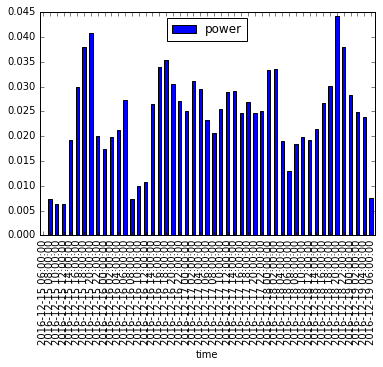

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

df = pd.read_csv('/home/petrum/doc/16rce.csv', parse_dates=[0], \
            date_parser=lambda x: pd.to_datetime(x.rpartition('-')[0]), \
            names=['time', 'id', 'usage'], usecols=[0, 3, 7], \
            index_col=1).set_index('time')
startdt = datetime.now() - timedelta(days=4)

df = df.loc[df.index > startdt]
#df = df[df.index > startdt] # this works too!

df = df.resample(rule='2H', how='last')
df = df.reset_index()
df['elapsed'] = df['time']
df = df.set_index('time')
df = df.diff()
df['sec'] = (df.elapsed.astype(np.int64) / 1000000000).astype(int)
df['power'] = df.usage / df.sec
df = df[df.usage != 0]
df.drop(df.columns[[0, 1, 2]], axis=1, inplace=True)
df.plot(kind='bar')
